In [1]:
# Importing useful libraries and supressing the warning messages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append("..")
warnings.filterwarnings('ignore')

In [2]:
# Importing some scripts

from scripts.data_visualization import Data_Viz 
from scripts.data_cleaning import DataCleaner
#from scripts.visualization_logger import logger


In [3]:
# Importing clean call center data

call_center_clean = pd.read_excel(r'C:\Users\hp\OneDrive - students.jkuat.ac.ke\Desktop\Tiko\call_center_clean.xlsx')
call_center_clean.head()

,Rafiki Id,Call status,Gender,Year of birth,Visited facility,Tiko card,Satisfaction,Feedback,Concerns,Month
0,1920703,Not reachable,Unknown,Unknown,Unknown,Unknown,Not provided,Not provided,Not provided,June
1,2016625,Not reachable,Unknown,Unknown,Unknown,Unknown,Not provided,Not provided,Not provided,June
2,2013477,Not reachable,Unknown,Unknown,Unknown,Unknown,Not provided,Not provided,Not provided,June
3,2016141,Not reachable,Unknown,Unknown,Unknown,Unknown,Not provided,Not provided,Not provided,June
4,1970498,Not reachable,Unknown,Unknown,Unknown,Unknown,Not provided,Not provided,Not provided,June


In [4]:
del call_center_clean['Rafiki Id']
call_center_clean.head()

,Call status,Gender,Year of birth,Visited facility,Tiko card,Satisfaction,Feedback,Concerns,Month
0,Not reachable,Unknown,Unknown,Unknown,Unknown,Not provided,Not provided,Not provided,June
1,Not reachable,Unknown,Unknown,Unknown,Unknown,Not provided,Not provided,Not provided,June
2,Not reachable,Unknown,Unknown,Unknown,Unknown,Not provided,Not provided,Not provided,June
3,Not reachable,Unknown,Unknown,Unknown,Unknown,Not provided,Not provided,Not provided,June
4,Not reachable,Unknown,Unknown,Unknown,Unknown,Not provided,Not provided,Not provided,June


In [5]:
# Statistics summary

call_center_clean.describe(include='all').T

,count,unique,top,freq
Call status,1389,6,Not reachable,1123
Gender,1389,3,Unknown,1248
Year of birth,1389,4,Unknown,1249
Visited facility,1389,3,Unknown,1249
Tiko card,1389,3,Unknown,1265
Satisfaction,1389,3,Not provided,1265
Feedback,1389,6,Not provided,1265
Concerns,1389,7,Not provided,1291
Month,1389,4,June,1385


Inferences from the above statistics
- Most rafikis were unreachable
- The female gender topped in seeking the services
- The age that recorded the highest number are 15-20 year olds
- Most Rafikis were not issued a Tiko card
- The satisfaction rate was high
- Good feedback
- There were minimal concerns about the services offered and Tiko
- June recorded the highest calls

In [6]:
# Standardizing text data
call_center_clean['Concerns'] = call_center_clean['Concerns'].str.capitalize()
call_center_clean['Feedback'] = call_center_clean['Feedback'].str.capitalize()

In [7]:
# Checking unique encounters on call status
call_center_clean['Call status'].unique()

array(['Not reachable', 'No answer', 'Call later', 'Call successful',
       'Wrong recipient', 'Call rejected'], dtype=object)

In [8]:
# Isolate successful calls
successful_calls = call_center_clean[call_center_clean['Call status'] == 'Call successful']

print("Number of successful calls:", len(successful_calls))
print("\
First few rows of successful calls:")
print(successful_calls.head())

# Calculate the percentage of successful calls
success_rate = (len(successful_calls) / len(call_center_clean)) * 100
print(f"\
Percentage of successful calls: {success_rate:.2f}%")

Number of successful calls: 141
First few rows of successful calls:
         Call status  Gender Year of birth Visited facility Tiko card  \
350  Call successful  Female     2004-2009              Yes        No   
356  Call successful  Female     2004-2009              Yes       Yes   
357  Call successful  Female     2004-2009              Yes       Yes   
359  Call successful    Male     1998-2003              Yes        No   
366  Call successful  Female     1998-2003              Yes       Yes   

    Satisfaction              Feedback      Concerns Month  
350          Yes  The service was good  Not provided  June  
356          Yes  The service was good  Not provided  June  
357          Yes  The service was good  Not provided  June  
359          Yes  The service was good  Not provided  June  
366          Yes  The service was good  Not provided  June  
Percentage of successful calls: 10.15%


In [9]:
# Display unique values in the 'Year of birth' column
print("Unique values in 'Year of birth' column:")
print(call_center_clean['Year of birth'].unique())

# Display value counts
print("\
Value counts:")
print(call_center_clean['Year of birth'].value_counts().head(10))

# Display some basic information about the column
print("\
Column info:")
print(call_center_clean['Year of birth'].info())

print("\
Sample of rows with non-null 'Year of birth':")
print(call_center_clean[call_center_clean['Year of birth'].notnull()].head())

Unique values in 'Year of birth' column:
['Unknown' '2004-2009' '1998-2003' 'Before 1998']
Value counts:
Year of birth
Unknown        1249
2004-2009        77
1998-2003        58
Before 1998       5
Name: count, dtype: int64
Column info:
<class 'pandas.core.series.Series'>
RangeIndex: 1389 entries, 0 to 1388
Series name: Year of birth
Non-Null Count  Dtype 
--------------  ----- 
1389 non-null   object
dtypes: object(1)
memory usage: 11.0+ KB
None
Sample of rows with non-null 'Year of birth':
     Call status   Gender Year of birth Visited facility Tiko card  \
0  Not reachable  Unknown       Unknown          Unknown   Unknown   
1  Not reachable  Unknown       Unknown          Unknown   Unknown   
2  Not reachable  Unknown       Unknown          Unknown   Unknown   
3  Not reachable  Unknown       Unknown          Unknown   Unknown   
4  Not reachable  Unknown       Unknown          Unknown   Unknown   

   Satisfaction      Feedback      Concerns Month  
0  Not provided  Not provided

In [10]:
# Define a function to map the year ranges to estimated years
def estimate_year_of_birth(year_range):
    if year_range == '2004-2009':
        return 2006
    elif year_range == '1998-2003':
        return 2000
    elif year_range == 'Before 1998':
        return 1990
    else:
        return None

# Apply the function to create a new column

call_center_clean['Estimated Year of Birth'] = call_center_clean['Year of birth'].apply(estimate_year_of_birth)

# Display the head of the updated dataframe to confirm changes
print(call_center_clean[['Year of birth', 'Estimated Year of Birth']].tail(10))

     Year of birth  Estimated Year of Birth
1379       Unknown                      NaN
1380     2004-2009                   2006.0
1381     2004-2009                   2006.0
1382     2004-2009                   2006.0
1383     1998-2003                   2000.0
1384     2004-2009                   2006.0
1385     2004-2009                   2006.0
1386     1998-2003                   2000.0
1387     2004-2009                   2006.0
1388     2004-2009                   2006.0


In [11]:
# Calculate the age of each Rafiki based on the current year (2024) and the 'Estimated Year of Birth'
current_year = 2024

call_center_clean['Age'] = current_year - call_center_clean['Estimated Year of Birth']

# Filter the dataframe for successful calls
successful_calls = call_center_clean[call_center_clean['Call status'] == 'Call successful']

# Analyze overage Rafikis (age > 24)
overage_rafikis = successful_calls[successful_calls['Age'] > 24]

# Count the number of overage Rafikis
overage_count = overage_rafikis.shape[0]

# Display the result
print("Number of overage Rafikis (age > 24):", overage_count)
print


Number of overage Rafikis (age > 24): 5


<function print>

- This indicates that there are 63 Rafikis who are over 18 years old among the successful calls.

In [12]:
# Analyze facility visits
facility_visits = successful_calls['Visited facility'].value_counts()

# Display the result
print(facility_visits)
print


Visited facility
Yes        124
No          16
Unknown      1
Name: count, dtype: int64


<function print>

- The majority of Rafikis who were successfully contacted had visited a facility (124), while only 16 had not. This suggests that most Rafikis are actively engaging with the services provided.

In [13]:
# Analyze notable concerns and feedback
concerns_summary = successful_calls['Concerns'].value_counts().head(10)
feedback_summary = successful_calls['Feedback'].value_counts().head(10)

# Display the results
print(concerns_summary)
print("\
Top Feedback:")
print(feedback_summary)

Concerns
No                                       94
Not provided                             43
How to redeem tiko miles                  2
Where to locate the nearest tiko shop     1
0                                         1
Name: count, dtype: int64
Top Feedback:
Feedback
The services were good              59
The service was good                36
Rafiki says the service was good    28
Not provided                        17
She was not attended to              1
Name: count, dtype: int64


- The most common response for concerns is "no", suggesting that many Rafikis don't have specific concerns. However, some notable concerns include:

    - How to redeem tiko miles
    - Where to locate the nearest tiko shop
    - Rafiki reported not being attended to

- We note that 

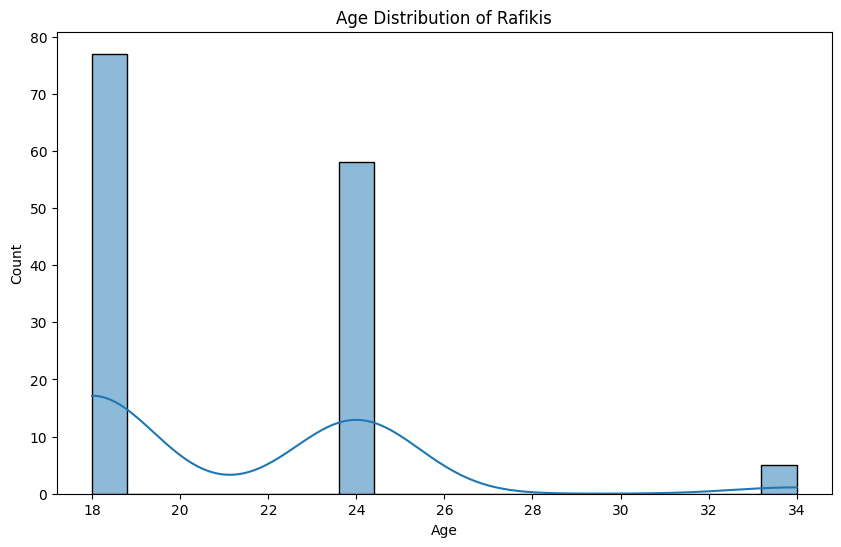

In [14]:
# 1. Age distribution of Rafikis
plt.figure(figsize=(10, 6))
sns.histplot(data=successful_calls, x='Age', bins=20, kde=True)
plt.title('Age Distribution of Rafikis')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('../charts/age_distribution.png')
plt.show()


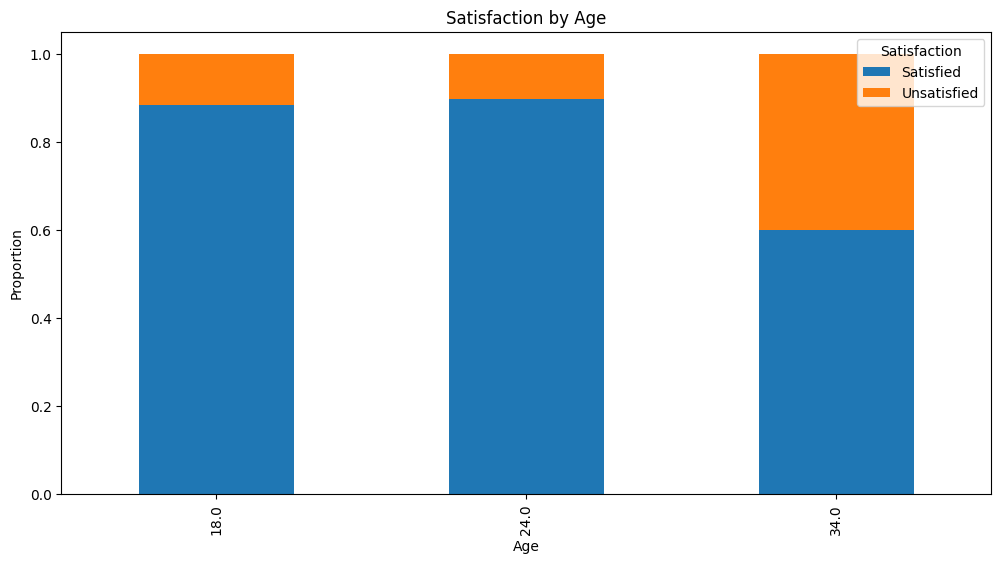

In [15]:
# 2. Relationship between age and service satisfaction
successful_calls['Satisfaction'] = successful_calls['Feedback'].apply(lambda x: 'Satisfied' if 'good' in str(x).lower() else 'Unsatisfied')
age_satisfaction = successful_calls.groupby('Age')['Satisfaction'].value_counts(normalize=True).unstack()
age_satisfaction.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Satisfaction by Age')
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.legend(title='Satisfaction')
plt.savefig('../charts/satisfaction_by_age.png')
plt.show()


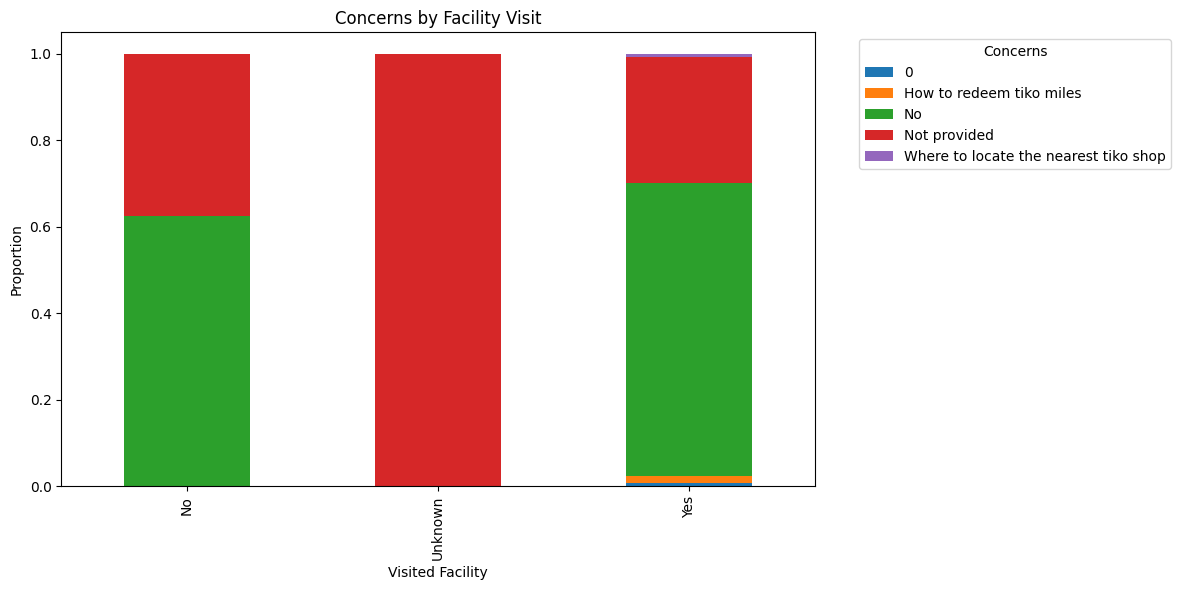

In [16]:
# 3. Patterns in concerns or feedback based on age or facility visits
concerns_by_visit = successful_calls.groupby('Visited facility')['Concerns'].value_counts(normalize=True).unstack()
concerns_by_visit.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Concerns by Facility Visit')
plt.xlabel('Visited Facility')
plt.ylabel('Proportion')
plt.legend(title='Concerns', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('../charts/concerns_by_visit.png')
plt.show()


In [17]:
# Display summary statistics
print("\
Summary Statistics:")
print(successful_calls['Age'].describe())


Summary Statistics:
count    140.000000
mean      21.057143
std        3.849267
min       18.000000
25%       18.000000
50%       18.000000
75%       24.000000
max       34.000000
Name: Age, dtype: float64


In [18]:
# Calculate correlation between age and satisfaction
successful_calls['Satisfaction_Numeric'] = successful_calls['Satisfaction'].map({'Satisfied': 1, 'Unsatisfied': 0})
correlation = successful_calls['Age'].corr(successful_calls['Satisfaction_Numeric'])
print(f"\
Correlation between Age and Satisfaction: {correlation:.2f}")


Correlation between Age and Satisfaction: -0.09


- The correlation between Age and Satisfaction is -0.09, indicating a very weak negative relationship. This means that as Age increases, Satisfaction tends to decrease.

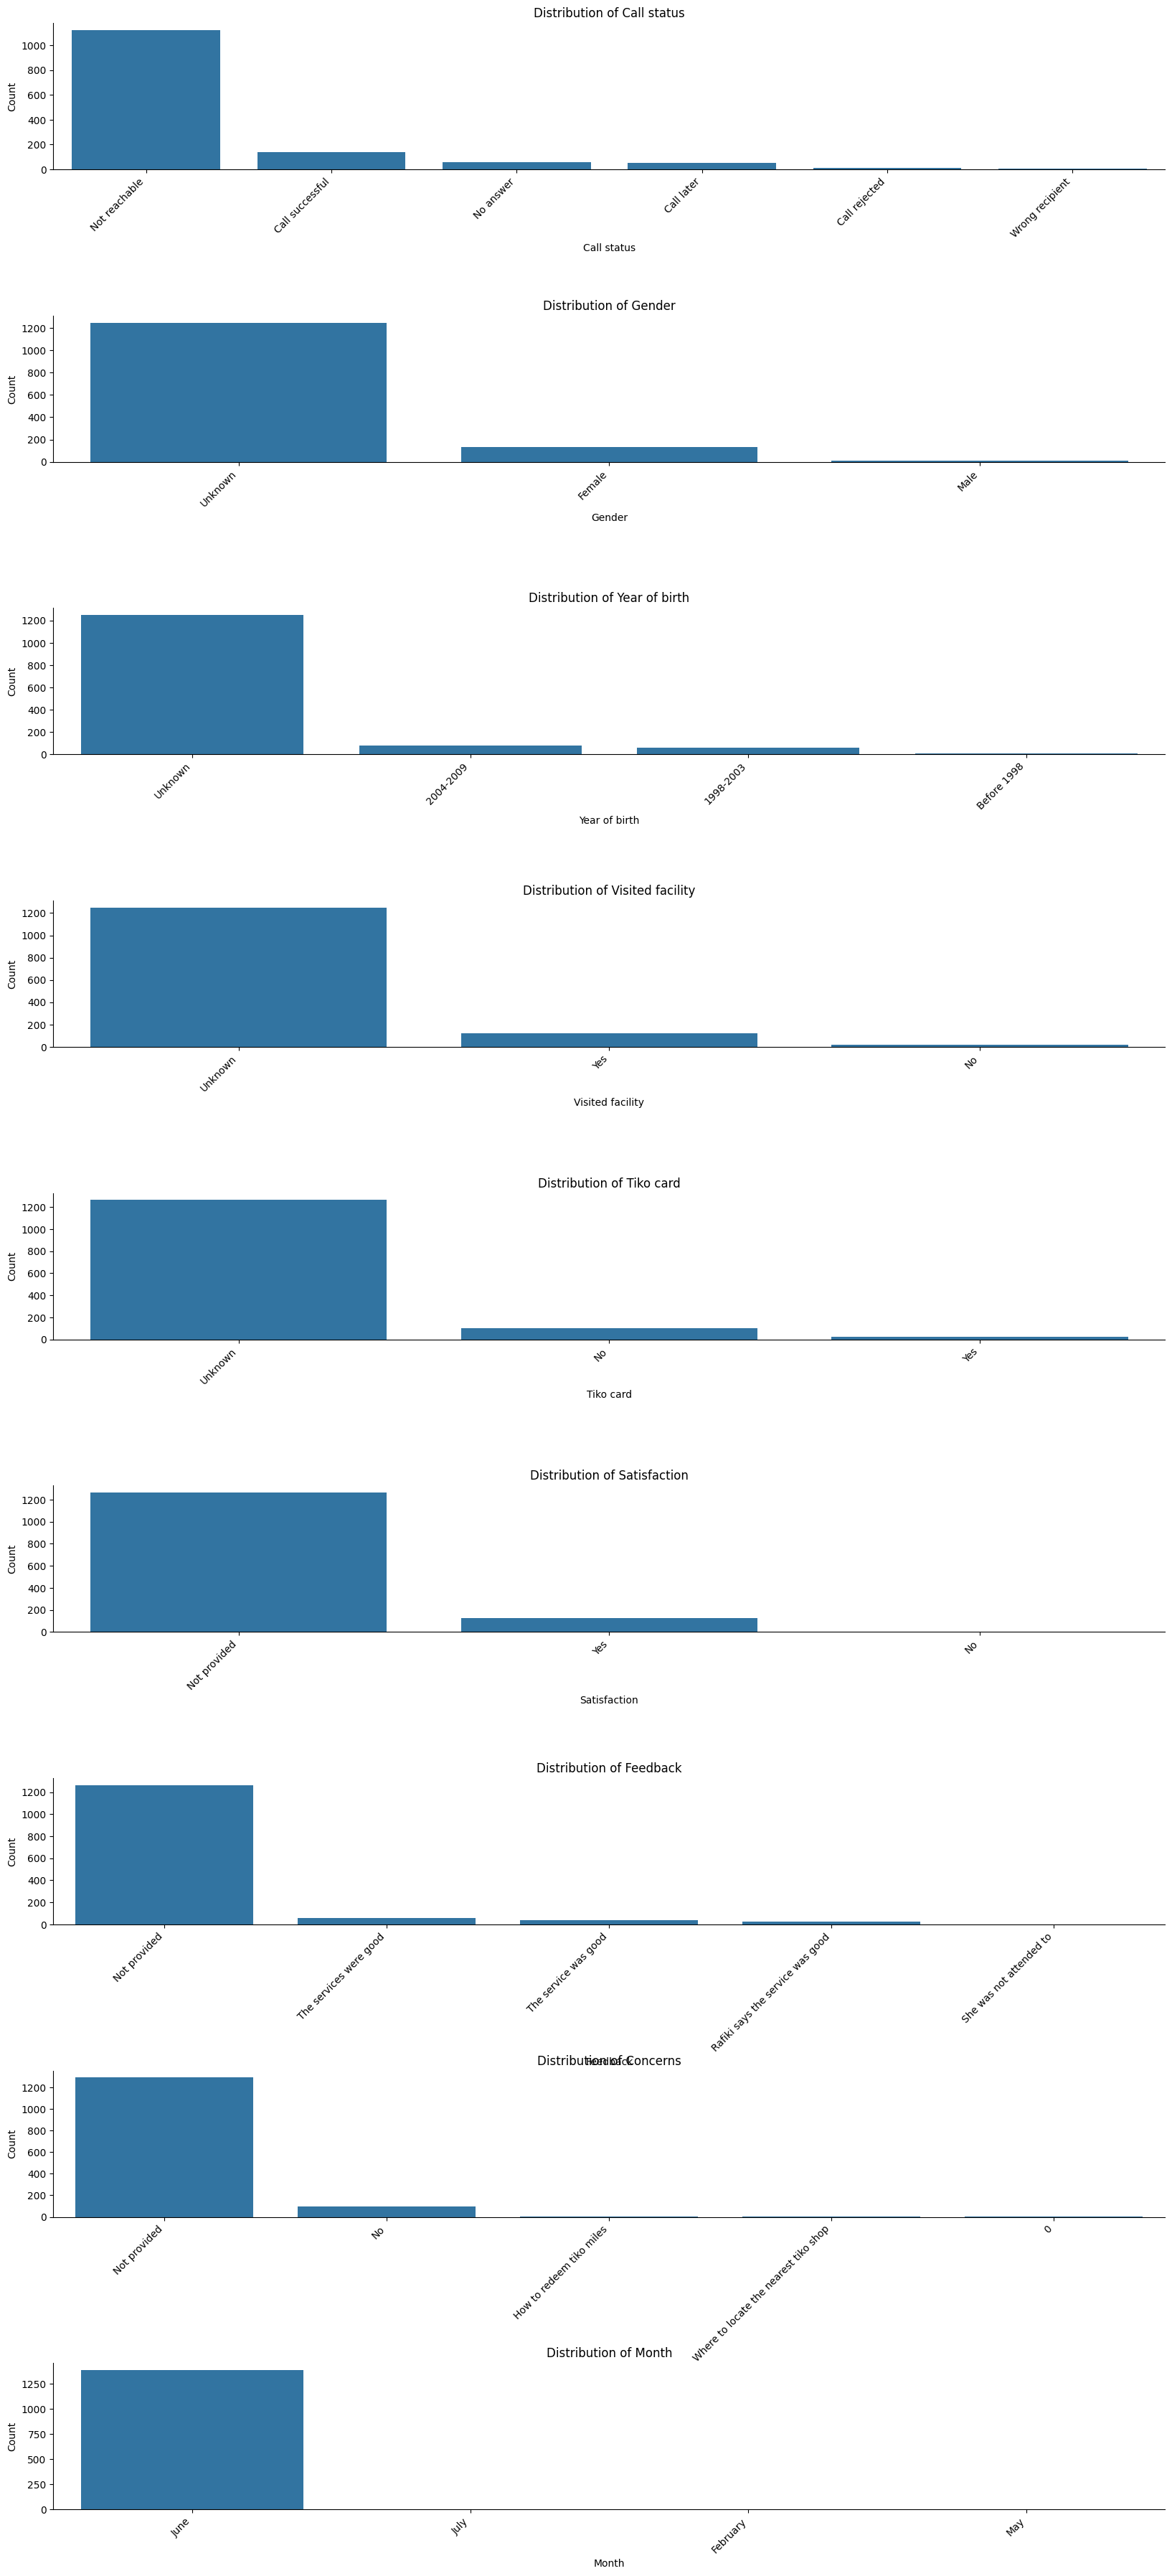

Value counts for Call status:
Call status
Not reachable      1123
Call successful     141
No answer            58
Call later           50
Call rejected        10
Wrong recipient       7
Name: count, dtype: int64
---
Value counts for Gender:
Gender
Unknown    1248
Female      130
Male         11
Name: count, dtype: int64
---
Value counts for Year of birth:
Year of birth
Unknown        1249
2004-2009        77
1998-2003        58
Before 1998       5
Name: count, dtype: int64
---
Value counts for Visited facility:
Visited facility
Unknown    1249
Yes         124
No           16
Name: count, dtype: int64
---
Value counts for Tiko card:
Tiko card
Unknown    1265
No          101
Yes          23
Name: count, dtype: int64
---
Value counts for Satisfaction:
Satisfaction
Not provided    1265
Yes              123
No                 1
Name: count, dtype: int64
---
Value counts for Feedback:
Feedback
Not provided                        1265
The services were good                59
The service was g

In [19]:
# Identify categorical columns
categorical_columns = call_center_clean.select_dtypes(include=['object']).columns

# Create bar plots for each categorical variable
plt.figure(figsize=(20, 5 * len(categorical_columns)))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    value_counts = call_center_clean[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(hspace=1.0)
    plt.subplots_adjust(wspace=.5)
    sns.despine()

plt.savefig('../charts/categorical_variables_distribution.png')
plt.show()

# Print value counts for each categorical variable
for column in categorical_columns:
    print(f"\
Value counts for {column}:")
    print(call_center_clean[column].value_counts())
    print("\
---")
    